# Section by Bradley - Correlations, Distributions & Group Comparisons 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

load data

In [ ]:
education=pd.read_csv('C:\\Users\\Bradl\\DSA2040A_DataMining_Education_Analysis\\data\\final_dataset.csv')

## Correlation of numeric columns

In [13]:
#correlation matrix using only numeric columns

numeric_education = education.select_dtypes(include=[np.number])
corr = numeric_education.corr()
print(corr)

                      StudyHours  Attendance       Age  LearningStyle  \
StudyHours              1.000000    0.028129 -0.000619       0.022344   
Attendance              0.028129    1.000000 -0.043560      -0.029026   
Age                    -0.000619   -0.043560  1.000000      -0.008317   
LearningStyle           0.022344   -0.029026 -0.008317       1.000000   
OnlineCourses          -0.002186    0.006515  0.002189       0.005006   
Discussions             0.027621   -0.006918 -0.023417      -0.013324   
AssignmentCompletion    0.008900   -0.001892 -0.011710       0.024055   
ExamScore               0.004201   -0.014156 -0.010137       0.008282   
EduTech                 0.013740    0.005355  0.012547       0.012408   
StressLevel             0.005621   -0.017937  0.008071       0.012171   

                      OnlineCourses  Discussions  AssignmentCompletion  \
StudyHours                -0.002186     0.027621              0.008900   
Attendance                 0.006515    -0.006918

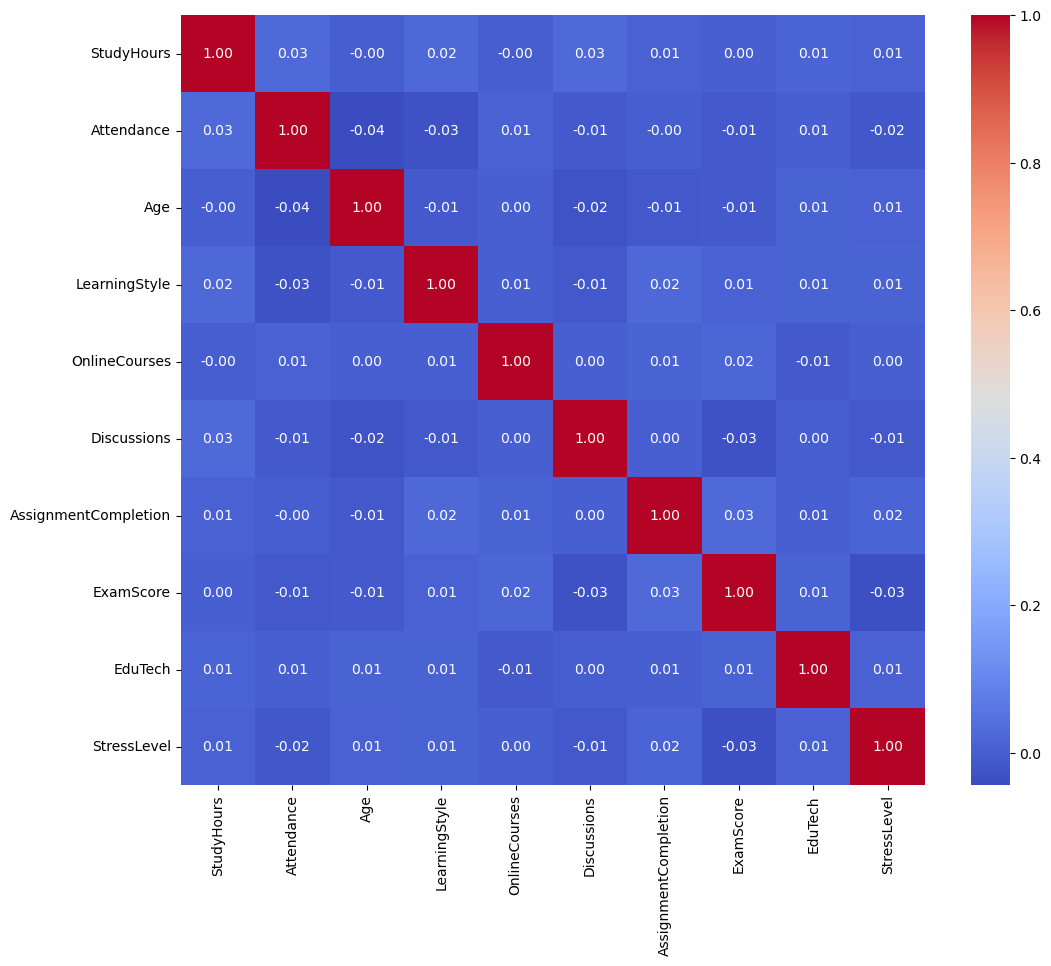

In [14]:
#plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [15]:
# show highest correlations
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
print("Highest correlations:\n", sorted_corr[sorted_corr < 1].head(10))

Highest correlations:
 Attendance            StudyHours              0.028129
StudyHours            Attendance              0.028129
                      Discussions             0.027621
Discussions           StudyHours              0.027621
AssignmentCompletion  ExamScore               0.027402
ExamScore             AssignmentCompletion    0.027402
AssignmentCompletion  LearningStyle           0.024055
LearningStyle         AssignmentCompletion    0.024055
StudyHours            LearningStyle           0.022344
LearningStyle         StudyHours              0.022344
dtype: float64


This plot shows the correlation of the numerical columns ; ['Age', 'AssignmentCompletion', 'Attendance', 'ExamScore', 'OnlineCourses', 'StudyHours']

## Distributions 

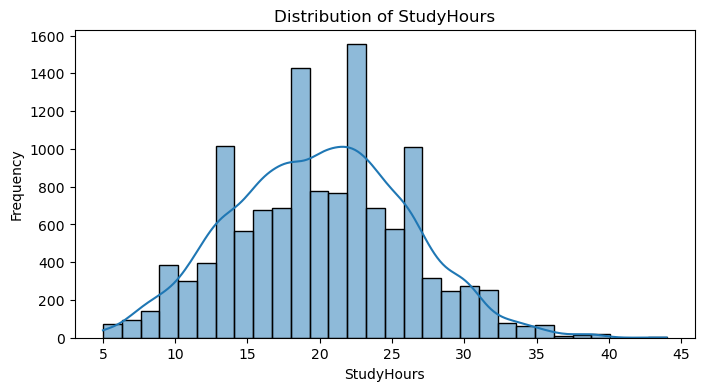

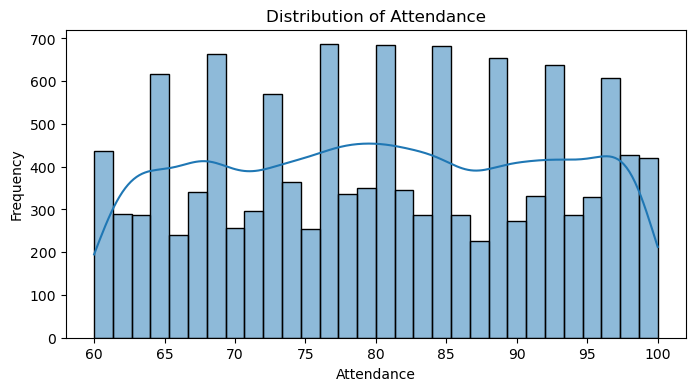

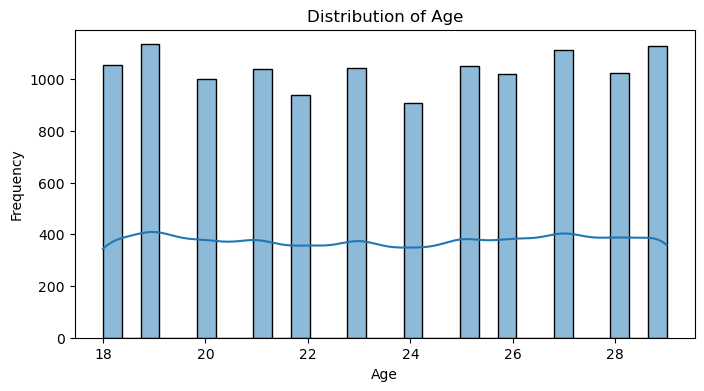

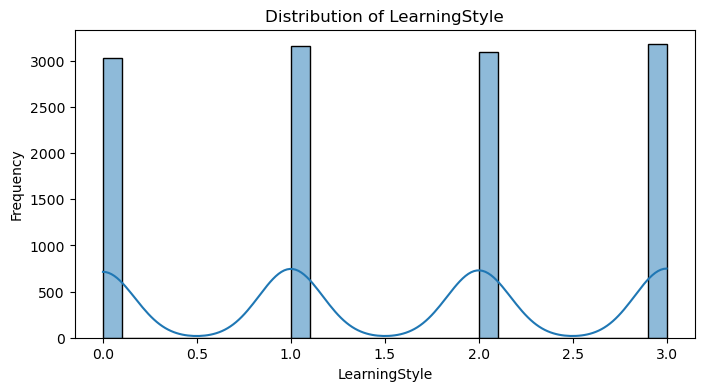

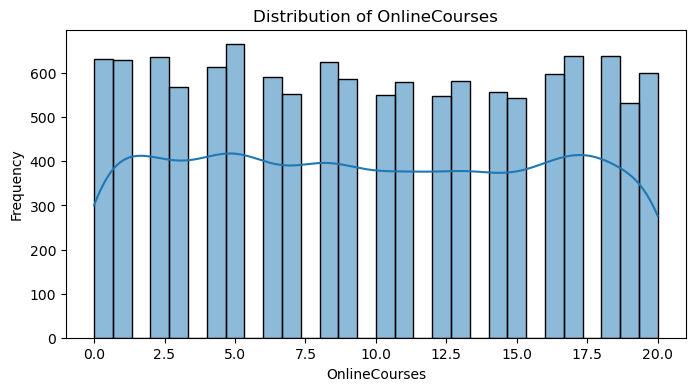

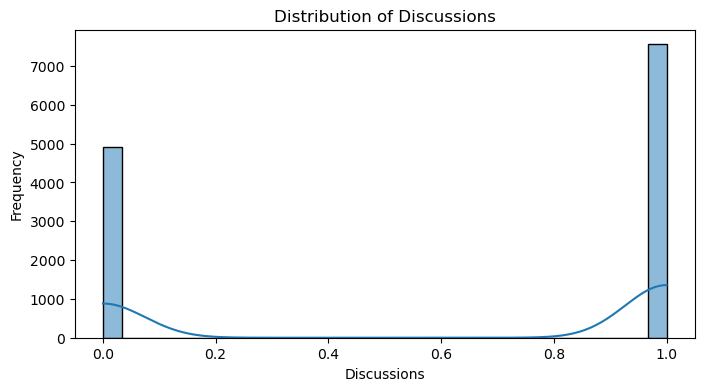

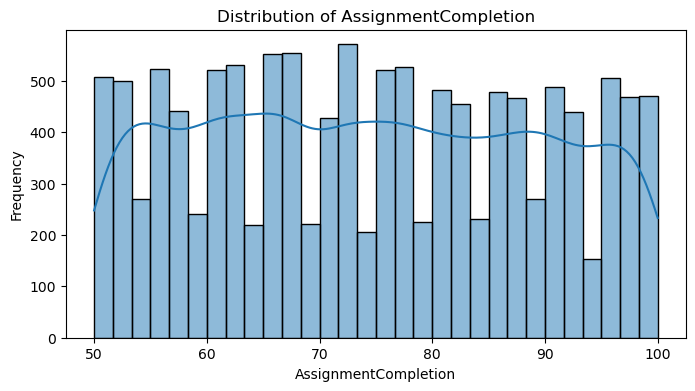

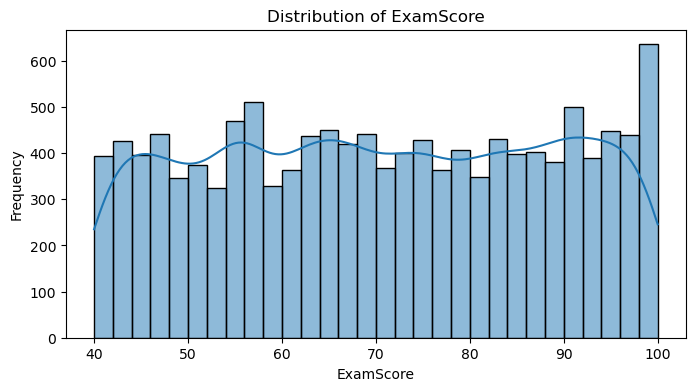

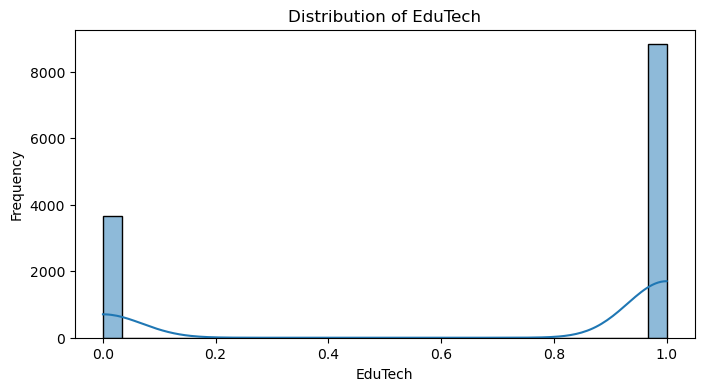

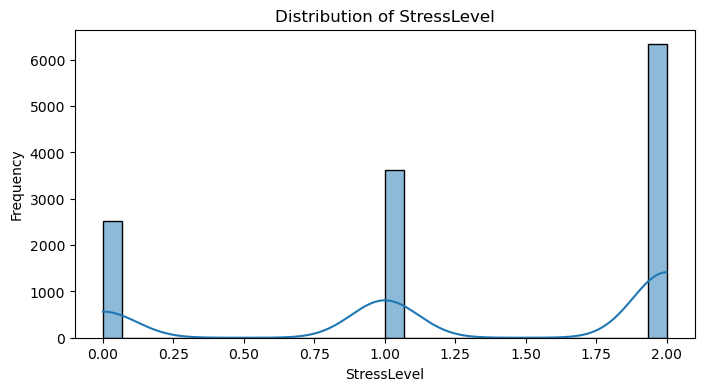

In [16]:
# drstirubutions
numeric_cols = numeric_education.columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_education[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

## Group Comparisons

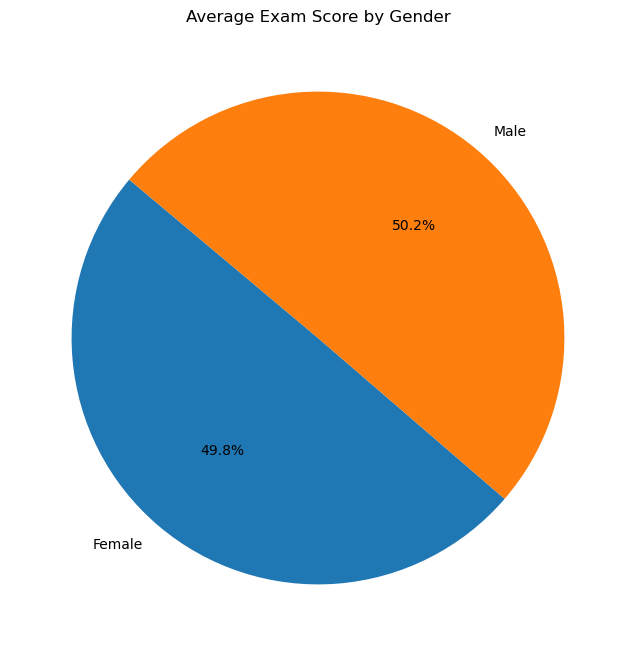

In [34]:
#group comparisons
grouped_by_gender = education.groupby('Gender')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_by_gender['ExamScore'], labels=grouped_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Gender')
plt.show()

In [24]:
#make age groups
group_by_age_group = education.copy()
bins = [16, 19, 22, 25, 30, np.inf]
labels = ['17-19', '20-22', '23-25', '26-30', '31+']
group_by_age_group['AgeGroup'] = pd.cut(group_by_age_group['Age'], bins=bins, labels=labels)

# mean exam score by age group
grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()

print(grouped_by_age_group.sort_values(by='AgeGroup'))

  AgeGroup  ExamScore
0    17-19  70.620438
1    20-22  70.107011
2    23-25  70.550932
3    26-30  70.125815
4      31+        NaN


C:\Users\Bradl\AppData\Local\Temp\ipykernel_57872\3075337269.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()


posx and posy should be finite values
posx and posy should be finite values


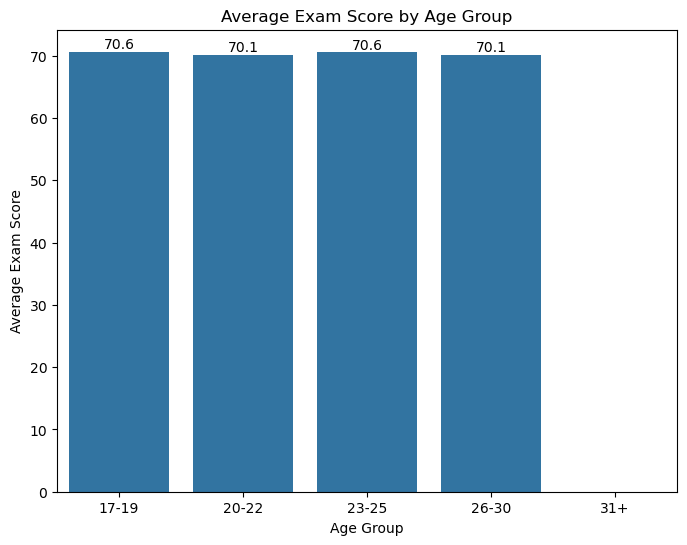

In [25]:
#plot average exam score by age group

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='ExamScore', data=grouped_by_age_group, order=labels)

# add data points for age groups on the bars
for i, score in enumerate(grouped_by_age_group['ExamScore']):
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')

plt.title('Average Exam Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Exam Score')
plt.show()

Exams Score by Stress level

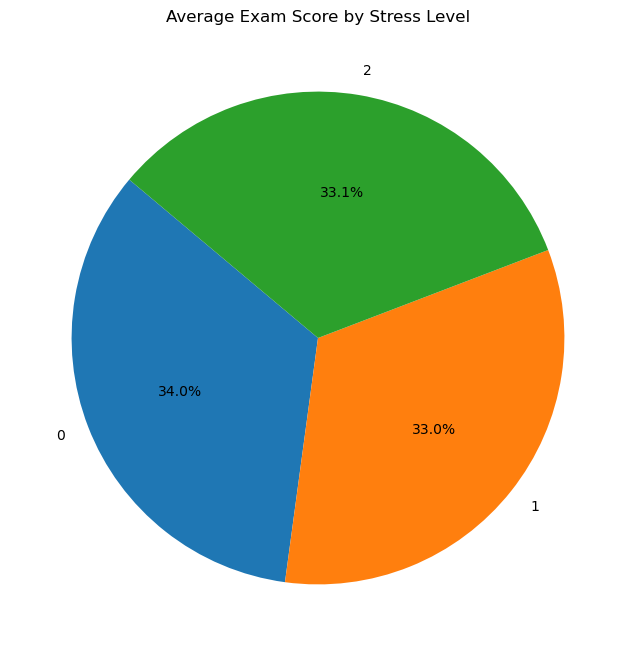

In [ ]:
## group comparisons by Stress Level
group_by_stress = education.groupby('StressLevel')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_by_stress['ExamScore'], labels=group_by_stress['StressLevel'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Stress Level')
plt.show()

C:\Users\Bradl\AppData\Local\Temp\ipykernel_57872\1254385294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


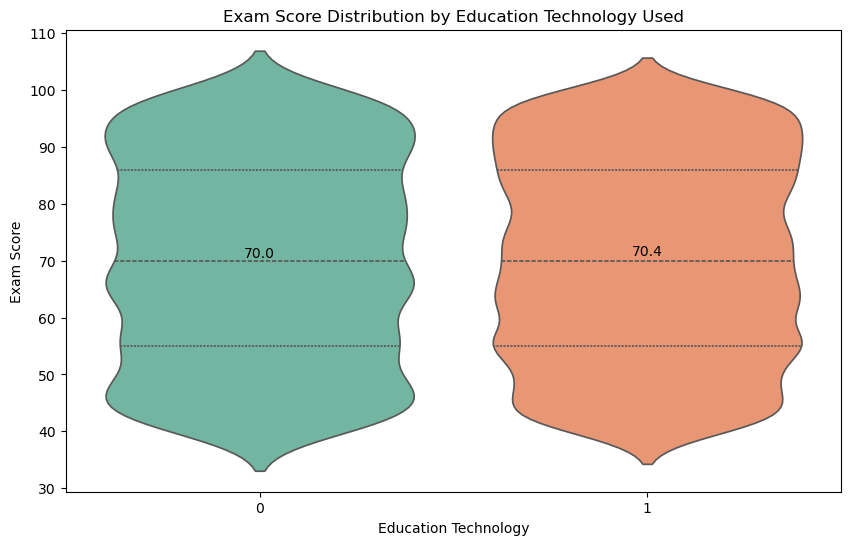

In [ ]:
# group by Education tech by examscore
group_by_edutech = education.groupby('EduTech')['ExamScore'].mean().reset_index()

# make violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


#add data values
for i, tech in enumerate(group_by_edutech['EduTech']):
    score = group_by_edutech[group_by_edutech['EduTech'] == tech]['ExamScore'].values[0]
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')


plt.title('Exam Score Distribution by Education Technology Used')
plt.xlabel('Education Technology')
plt.ylabel('Exam Score')
plt.show()

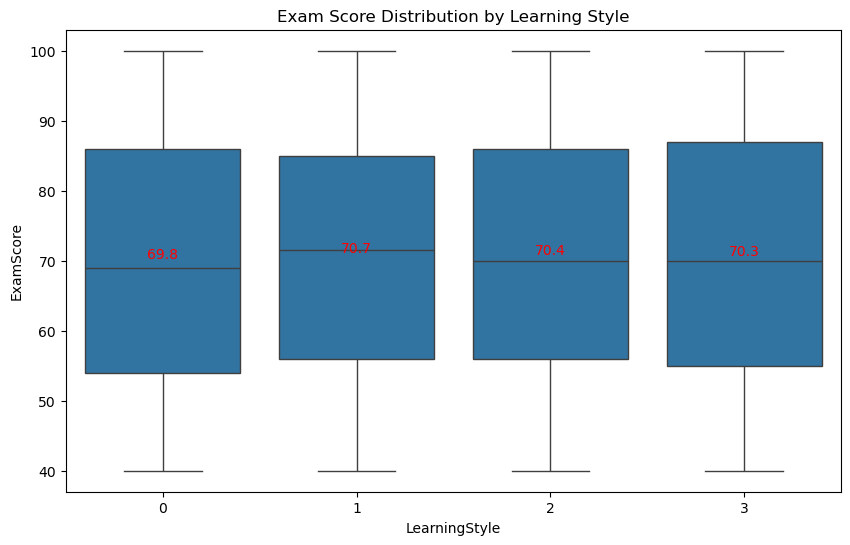

In [36]:
##learning styles comparisons
group_by_learning_style = education.groupby('LearningStyle')['ExamScore'].mean().reset_index()

# box plot for learning styles
plt.figure(figsize=(10, 6))
sns.boxplot(x='LearningStyle', y='ExamScore', data=education)
#add data points for learning styles on the boxplot
for i, style in enumerate(group_by_learning_style['LearningStyle']):
    mean_score = group_by_learning_style[group_by_learning_style['LearningStyle'] == style]['ExamScore'].values[0]
    plt.text(i, mean_score + 0.5, f'{mean_score:.1f}', ha='center', color='red')
plt.title('Exam Score Distribution by Learning Style')
plt.show()